### K-Means算法介绍

<p>给定样本集$D={x_1,x_2，\cdots,x_N}$，其中$x_i=(x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})$假设聚类的簇划分$\mathscr{C}={C_1,C_2,\cdots,C_K}$。K-Means算法的目标是最小化平方误差。</p>
<p>现在要求最优化问题：</p>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
$$ \min_{\mathscr{C}}\sum_{k=1}^K\sum_{x_i\in C_k}\parallel x_i-\mu_k\parallel_2^2 $$
</div>    
<p>其中$\mu_k=\frac{1}{|C_k|}\sum_{x_i\in C_k}x_i$</p>
<p>该问题的求解需要考察样本集合$D$的所有可能的簇划分。K-Means算法采用贪心策略，通过迭代优化来近似求解。其原理为：K-Means算法首先假设一组向量作为所有簇的簇均值向量，然后根据假设的簇均值向量给出了数据集D的一个簇划分，再根据这个簇划分来计算真实的簇均值向量</p>
<ul>
    <li>如果真实的簇均值向量等于假设的簇均值向量，则说明假设正确。根据假设簇均值向量给出的数据集D的一个簇划分确实是原问题的解</li>
    <li>如果真实的簇均值向量不等于假设的簇均值向量，则可以将真实的簇均值向量作为新的假设簇均值向量，继续求解。</li></ul>
<p>K-Means算法的<b>策略</b>是：样本离哪个簇的簇均值向量近，则该样本就划归到那个簇</p>

<p>输入：样本集$D=\left\{x_1,x_2，\cdots,x_N\right\}$；聚类簇数$K$</p>
<p>输出：簇划分$\mathscr{C}$</p>
<p>算法步骤：</p>
<ul>
    <li>从$D$中随机选择$K$个样本作为初始簇均值向量${\mu_1,\mu_2,\cdots,\mu_K}$</li>
    <li>重复迭代直到算法收敛，迭代内容如下:</li>
    <ul>
        <p>初始化阶段：取$C_k=\phi,k=1,2,\cdots,K$</p>
        <p>划分阶段：令$i=1,2,\cdots,N$</p>
        <ul>
            <li>计算$x_i$的簇标记如下：
            $$\lambda_i=\arg\min_k\parallel x_i-\mu_k\parallel_2,k\in{1,2,\cdots,K}$$</li>
            <li>然后将样本$x_i$划入相应的簇：
            $$C_{\lambda_i}=C_{\lambda_i}\bigcup\left\{x_i\right\}$$</li></ul>
        <p>重计算阶段：计算$\hat{\mu}_k=\frac{1}{|C_k|}\sum_{x_i\in C_k}x_i$</p>
        <p>终止条件判断：</p>
        <ul>
            如果对所有的$k\in{1,2,\cdots,K}$,都有$\hat{\mu}_k=\mu_k$，则算法收敛，终止迭代；否则重复制$\mu_k=\hat{\mu}_k$</ul>
     </ul>
</ul>

## 数据集描述

本实验所用数据集来自sklearn官方的用于分类任务的iris数据集，数据集的详细描述可见下表：

|字段名称|字段含义|取值范围|
|----|----|----|
|Classes|类别数量|3|
|Samples per class|每类样本数量|50|
|Samples total|总样本量|150|
|Dimensionality|数据维度|4|

解释变量的详细描述如下：

|特征名称|特征含义|
|----|----|
|sepal length|萼片长度|
|sepal width|萼片宽度|
|petal length|花瓣长度|
|petal width|花瓣宽度|

标签数据共有三种，分别是Setosa，Versicolour，Virginica.

## 6. 实验步骤
### 步骤1 引入必要的库

In [4]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets import load_iris 
# %matplotlib inline

### 用K-Means算法拟合模型
**K-Means**的常用参数和方法介绍如下：
>常用参数:
>>`init`：类中心的初始化方法  
>>`n_clusters`：要形成的聚类数量，也是要生成的聚类中心数量<br>
>>`n_init`：设置选择质心种子次数。返回聚类中心最好的一次结果（好是指计算时长短） 

>常用方法：
>>`fit(X[, y, sample_weight])`：计算k-均值聚类     
>>`fit_predict(X[, y, sample_weight])`：计算聚类中心并预测每个样本的聚类索引<br>
>>`predict(X[, sample_weight])`：预测X中每个样本所属的最接近的聚类

In [5]:
#使用load_iris() 函数, 将iris数据集储存在变量iris中
iris = load_iris()

In [6]:
# 将iris.data赋值给X变量，将iris.target赋值给y变量
X = iris.data
y = iris.target 

/var/folders/9t/22r4qzbs62v_jf1hlbpptjvw0000gn/T/ipykernel_94442/3494872671.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
/var/folders/9t/22r4qzbs62v_jf1hlbpptjvw0000gn/T/ipykernel_94442/3494872671.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=la

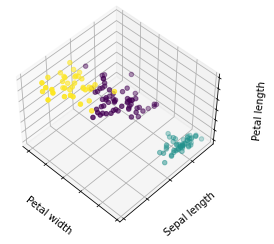

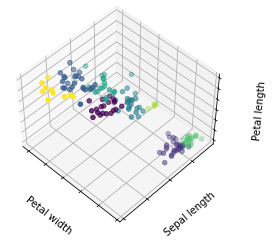

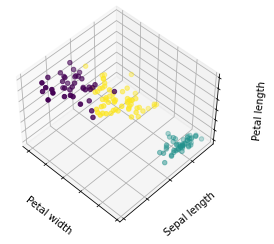

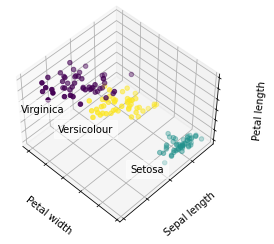

In [7]:
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# 绘制结果
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
#重新排序标签以使颜色与聚类结果匹配
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()